In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
#Install the necessary libraries
import pandas as pd
# importing Clasiffication Models from SKlearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
##Load data Set
BcDf = pd.read_csv("D:\Kamesh\DS\Bank_Personal_Loan_Modelling-1.csv")

In [4]:
#Check the file is loaded correctly ot Not
BcDf.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#To check the Columns
BcDf.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


The attributes can be divided accordingly :

1. The feature ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
2. The binary category have five variables as below:
  Personal Loan - This is our target variable
  Securities Account - The feature tells us about the customer is having a securities account with the bank or Not.
  CD Account - This features tells us the customer haveing  a certificate of deposit (CD) account with the bank or not.
  Online - This feature tells us the customer use internet banking facilities or Not.
  Credit Card - This feature tells us the the customer use a credit card issued by UniversalBank or Not.
3. Interval variables are as below:
  Age - Age of the customer
  Experience - Years of experience
  Income - Annual income in dollars
  CCAvg - Average credit card spending
  Mortage - Value of House Mortgage
4. Ordinal Categorical Variables are:
  Family - Family size of the customer
  Education - education level of the customer
5. The nominal variable is :
  ID
  Zip Code

In [6]:
#check the number of observations and nunmber of features in the date set
BcDf.shape

(5000, 14)

#There are 5000 Observation and 14 feauters are there in the data set

In [7]:
#check the Data types of the data set
BcDf.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

All features are either Integer or Float data types. There are no Categorical data type features.

In [5]:
#Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
BcDf.groupby(['Personal Loan']).count()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Out of 5000 observations, only 480 customers are availing the loan. Approximately 9% of customers are availing the loan.

In [6]:
##Descriptive statistiacs of the data set
BcDf.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1.Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. Mean is We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.
2.Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. As data is normally distributed, we can replace negative values with median.
3.Income is positively skewed. We can confirm this by saying the mean is greater than the median
4.CCAvg is positively skewed variable average spending is between 0K to 10K and majority spends less than 2.5K
5.Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
6.Personal Loan - only 9% of the people are availing the loan.

In [10]:
##Print all -ve experience obseervations:
BcDf[BcDf['Experience']<0]['Experience'].count()

52

There are 52 observations in the data set who experiece is less than zero.We have to fill this data with Experience Median as Experience data is normally distibuted.

In [11]:
#calculate the Median for the +ve expereinec observations
dfExp = BcDf.loc[BcDf['Experience'] >0]
dfExp
ExpMedian = dfExp['Experience'].median()
ExpMedian

21.0

In [12]:
#Before replacing with Median
BcDf.iloc[85:90]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
85,86,27,2,109,94005,4,1.8,3,0,0,0,0,0,0
86,87,40,16,42,94501,4,2.2,2,126,0,0,0,0,0
87,88,48,22,78,94305,3,1.1,1,0,0,0,0,1,0
88,89,65,41,51,94117,2,1.1,1,0,0,0,0,1,0
89,90,25,-1,113,94303,4,2.3,3,0,0,0,0,0,1


In [13]:
#Replace -ve experiece with Medain
def loc():
    BcDf['Experience'].loc[BcDf['Experience'] < 0] = ExpMedian

loc()

In [14]:
#After replacing with Median
BcDf.iloc[85:90]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
85,86,27,2.0,109,94005,4,1.8,3,0,0,0,0,0,0
86,87,40,16.0,42,94501,4,2.2,2,126,0,0,0,0,0
87,88,48,22.0,78,94305,3,1.1,1,0,0,0,0,1,0
88,89,65,41.0,51,94117,2,1.1,1,0,0,0,0,1,0
89,90,25,21.0,113,94303,4,2.3,3,0,0,0,0,0,1


In [15]:
# checking if there are records with negative experience
BcDf[BcDf['Experience'] < 0]['Experience'].count()

0

In [17]:
BcDf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.338000,11.253190,0.0,11.00,21.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


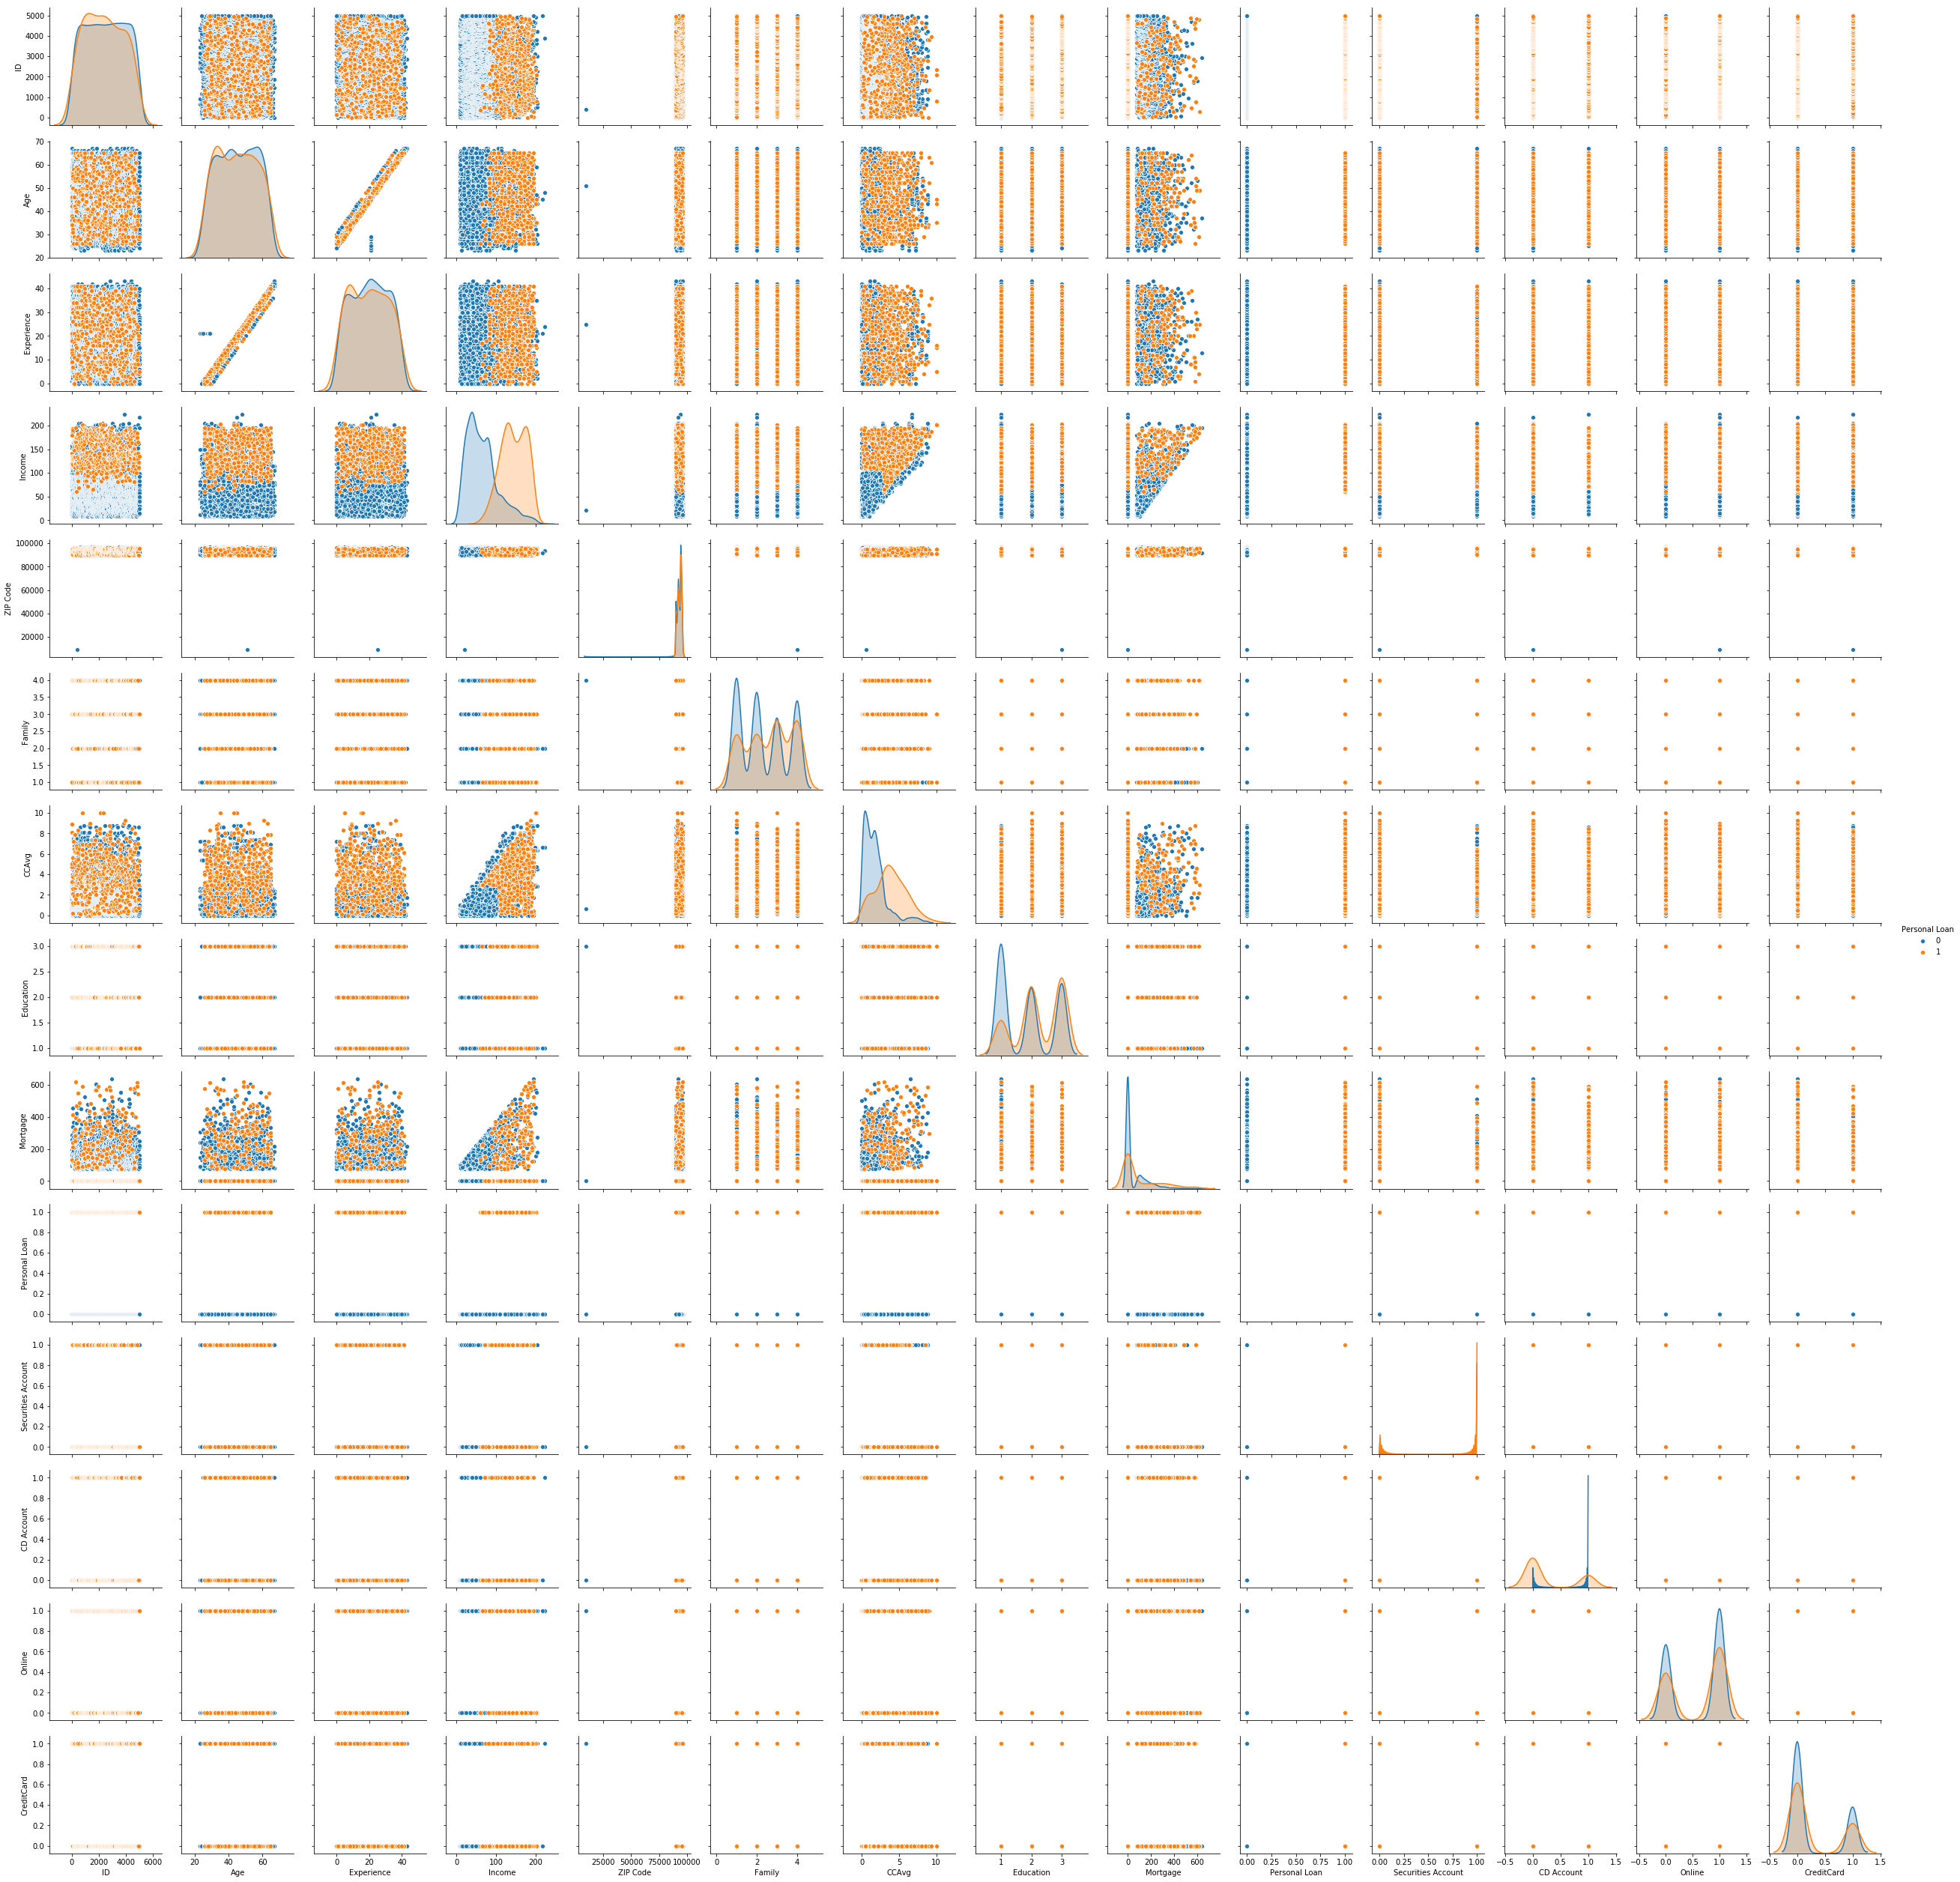

In [18]:
##Pair plot analysis
sns.pairplot(BcDf,diag_kind='kde',hue="Personal Loan")

Obervations:
1.ID feature data is overalapping between perosonal loan availed and Not availed. However this feature is not having any significance realation to the Targer feature.
2.Age feature data is overalapping between perosonal loan availed and Not availed. It seems all kind of age people availed loan.

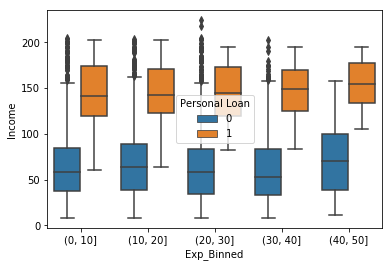

In [20]:
#Influence of Experiece and Income on personal loan
bins_Exp = [0,10,20,30,40,50]
BcDf['Exp_Binned'] = pd.cut(BcDf['Experience'],bins_Exp)
sns.boxplot(x='Exp_Binned',y='Income',hue='Personal Loan',data=BcDf)

It seems the customers who has taken the personal loan have the same income levels and All level of Experice people had opted for loan. 

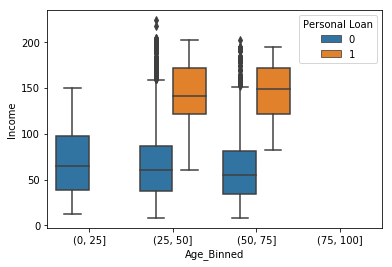

In [54]:
#Influence of income and education on personal loan
bins = [0, 25, 50, 75, 100]
BcDf['Age_Binned'] = pd.cut(BcDf['Age'], bins)

sns.boxplot(x='Age_Binned',y='Income',hue='Personal Loan',data=BcDf)

It seems the customers who has taken the personal loan have the same income levels and most of the customers who have taken the loan will fall between the age from 25 to 74

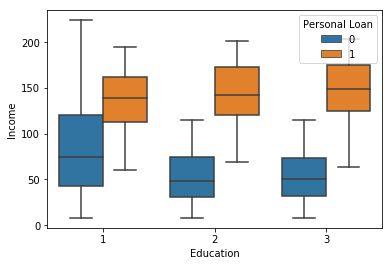

In [17]:
#Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=BcDf)

It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

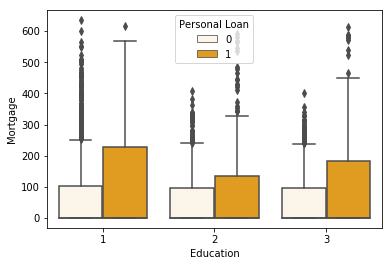

In [58]:
#Influence of Mortage and education on personal loan
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=BcDf,color='orange')

Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage.

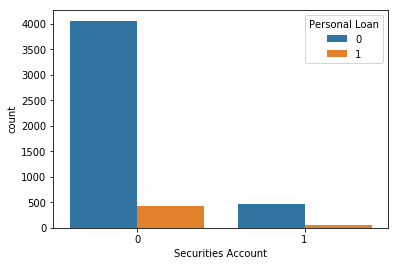

In [62]:
#Influence of Security Account and on personal loan
sns.countplot(x="Securities Account", data=BcDf,hue="Personal Loan")

Observation : Majority of customers who does not have loan have securities account

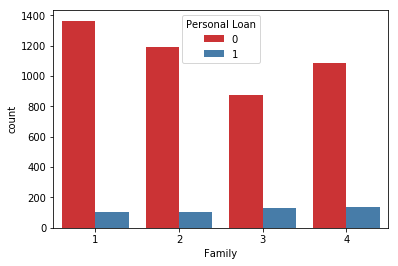

In [63]:
#Influence of Family and on personal loan
sns.countplot(x='Family',data=BcDf,hue='Personal Loan',palette='Set1')

Observation: Family size does not have any impact in personal loan.

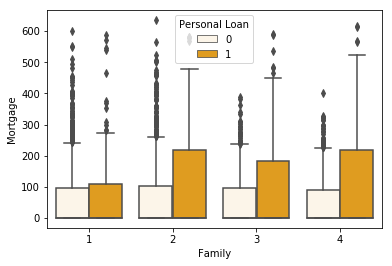

In [65]:
sns.boxplot(x="Family", y='Mortgage', hue="Personal Loan", data=BcDf,color='orange')

Inference : From the above chart it seems that customer who do not have personal loan have the high motagage and customer who has personal loan have high mortgage.

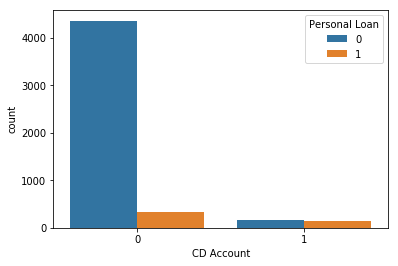

In [66]:
#Influence of CD Account and on personal loan
sns.countplot(x='CD Account',data=BcDf,hue='Personal Loan')

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

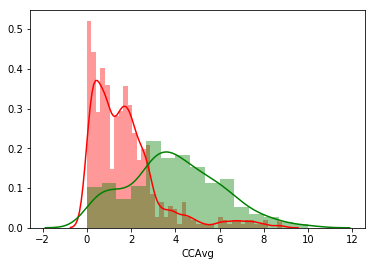

In [82]:
sns.distplot(BcDf[BcDf['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(BcDf[BcDf['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [84]:
print('Credit card spending of Non-Loan customers: ',BcDf[BcDf['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ',BcDf[BcDf['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

NameError: name 'Text' is not defined

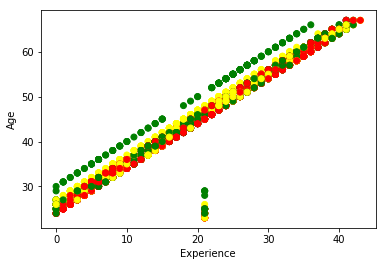

In [86]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(BcDf['Experience'],BcDf['Age'],c=BcDf['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')
Text(0,0.5,'Age')

Observation: The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

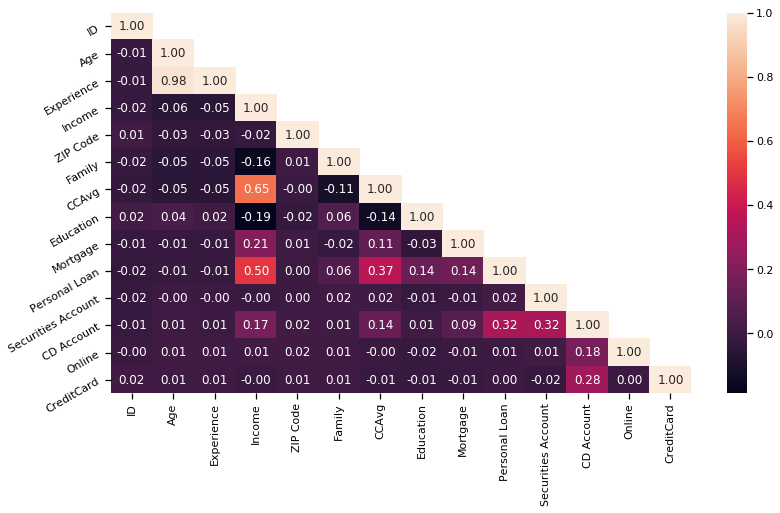

In [89]:
# Correlation with heat map
corr = BcDf.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

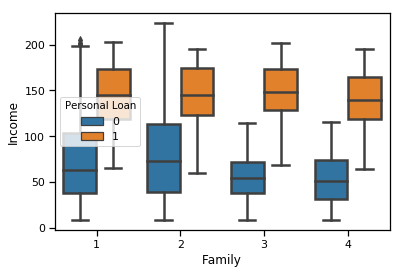

In [90]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data =BcDf)

Observation : Looking at the below plot, families with income less than 100K are less likely to take loan,than families with high income.

In [103]:
#Applying Models
#Split data in Train and Test
BcDf.head(10)
X=BcDf.drop(['ID','Experience','ZIP Code','Personal Loan','Age_Binned','Exp_Binned'],axis=1)
y =BcDf['Personal Loan']
test_size = 0.30 # taking 70:30 training and test set
seed = 1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [104]:
#Logistic Regression Model Building and Score
#fit the model on 30#
model_Logistic = LogisticRegression()
model_Logistic.fit(X_train,y_train)
y_predict = model_Logistic.predict(X_test)
modelLogistic_score = model_Logistic.score(X_test, y_test)
print(modelLogistic_score)

##Coefficient
coef_df = pd.DataFrame(model_Logistic.coef_, columns= X_train.columns)
coef_df['intercept'] = model_Logistic.intercept_
print(coef_df)

##confusion Metrics
print(metrics.confusion_matrix(y_test, y_predict))

# summarize the fit of the model
#Accuracy Score of Train
print('Train accuracy score')
train_model_score = model_Logistic.score(X_train,y_train)
print(train_model_score)
print('Test Accuracy score')
test_model_score = model_Logistic.score(X_test,y_test)
print(test_model_score)
#Print F1 score      
print(metrics.classification_report(y_test, y_predict))

0.942
        Age    Income    Family     CCAvg  Education  Mortgage  \
0 -0.018875  0.040949  0.458971  0.131205   1.194359  0.000529   

   Securities Account  CD Account   Online  CreditCard  intercept  
0           -0.905871    3.146824 -0.61143   -1.025069  -9.173641  
[[1337   14]
 [  73   76]]
Train accuracy score
0.9485714285714286
Test Accuracy score
0.942
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1351
          1       0.84      0.51      0.64       149

avg / total       0.94      0.94      0.94      1500



In [107]:
#Decision Tree Model Building and Score
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train,y_train)
y1_predict = dt_model.predict(X_test)
dtmodel_score = dt_model.score(X_test, y_test)
print(dtmodel_score)

##confusion Metrics
print(metrics.confusion_matrix(y_test, y1_predict))

# summarize the fit of the model
#Accuracy Score of Train
print('Train accuracy score')
train_model_score = dt_model.score(X_train,y_train)
print(train_model_score)
print('Test Accuracy score')
test_model_score = dt_model.score(X_test,y_test)
print(test_model_score)
#Print F1 score      
print(metrics.classification_report(y_test, y1_predict))


0.972
[[1340   11]
 [  31  118]]
Train accuracy score
0.9831428571428571
Test Accuracy score
0.972
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1351
          1       0.91      0.79      0.85       149

avg / total       0.97      0.97      0.97      1500



In [108]:
#Naive Base model Building and Evaluation
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

y2_predict = NBmodel.predict(X_test)
NBmodel_score = NBmodel.score(X_test, y_test)
print(NBmodel_score)

##confusion Metrics
print(metrics.confusion_matrix(y_test, y2_predict))

# summarize the fit of the model
#Accuracy Score of Train
print('Train accuracy score')
train_model_score = NBmodel.score(X_train,y_train)
print(train_model_score)
print('Test Accuracy score')
test_model_score = NBmodel.score(X_test,y_test)
print(test_model_score)
#Print F1 score      
print(metrics.classification_report(y_test, y2_predict))

0.8746666666666667
[[1227  124]
 [  64   85]]
Train accuracy score
0.8894285714285715
Test Accuracy score
0.8746666666666667
             precision    recall  f1-score   support

          0       0.95      0.91      0.93      1351
          1       0.41      0.57      0.47       149

avg / total       0.90      0.87      0.88      1500



In [109]:
#KNN model Building and Evaluation
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)

y3_predict = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print(knn_score)

##confusion Metrics
print(metrics.confusion_matrix(y_test, y3_predict))

# summarize the fit of the model
#Accuracy Score of Train
print('Train accuracy score')
train_model_score = knn.score(X_train,y_train)
print(train_model_score)
print('Test Accuracy score')
test_model_score = knn.score(X_test,y_test)
print(test_model_score)
#Print F1 score      
print(metrics.classification_report(y_test, y3_predict))

0.9033333333333333
[[1317   34]
 [ 111   38]]
Train accuracy score
0.9174285714285715
Test Accuracy score
0.9033333333333333
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1351
          1       0.53      0.26      0.34       149

avg / total       0.88      0.90      0.89      1500



KNN: 0.907600 (0.009541)
DTT: 0.979200 (0.004665)
NB: 0.883000 (0.011567)
LR: 0.949800 (0.007718)


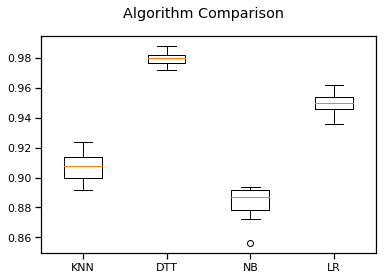

In [113]:
from sklearn import model_selection
#Model Comparision
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')))
models.append(('DTT', DecisionTreeClassifier(criterion = 'entropy',max_depth=3)))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Conclusion:
The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model